Accuracy: 0.5861
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       1.00      0.00      0.00        28
           2       0.24      0.15      0.19        33
           3       1.00      0.00      0.00        34
           4       0.69      0.89      0.78        46
           5       0.95      0.85      0.90        47
           6       0.91      0.91      0.91        35
           7       0.88      0.65      0.75        34
           8       0.22      1.00      0.36        30
           9       1.00      0.28      0.43        40

    accuracy                           0.59       360
   macro avg       0.79      0.56      0.53       360
weighted avg       0.80      0.59      0.56       360



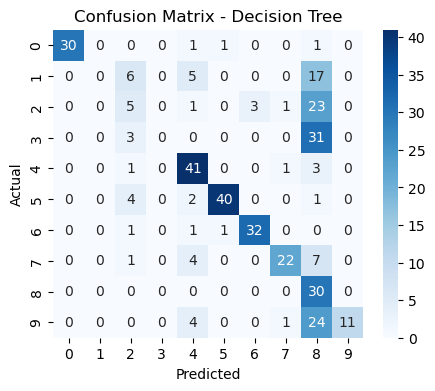

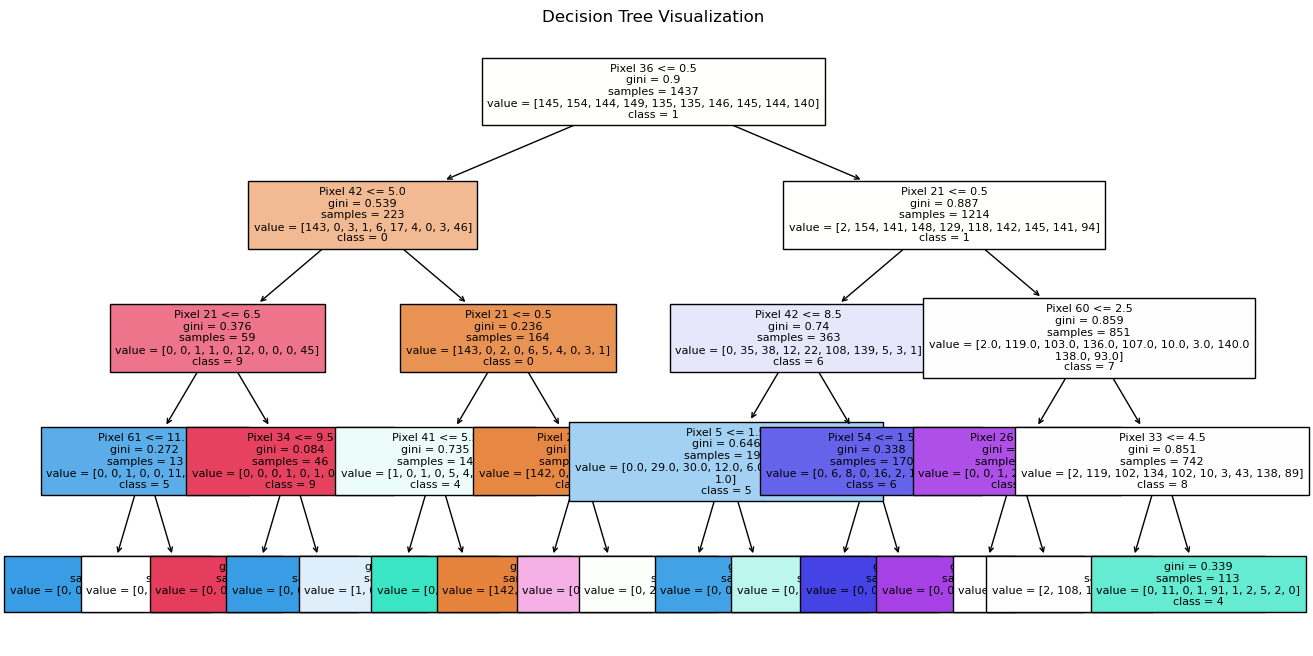

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load dataset
digits = load_digits()
X = digits.images.reshape(digits.images.shape[0], -1)  # Flatten images
y = digits.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
dt_pred = dt_model.predict(X_test)

# ✅ Accuracy (Fixed)
accuracy = accuracy_score(y_test, dt_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, dt_pred, zero_division=1))

# Confusion Matrix
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Decision Tree Visualization
plt.figure(figsize=(15, 8))
plot_tree(dt_model,
          filled=True,
          feature_names=[f'Pixel {i}' for i in range(X.shape[1])],
          class_names=[str(i) for i in np.unique(y)],
          fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.93      1.00      0.97        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       0.94      0.98      0.96        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.96      0.90      0.93        30
           9       0.93      0.93      0.93        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



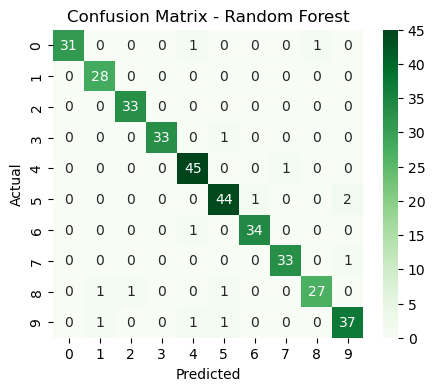

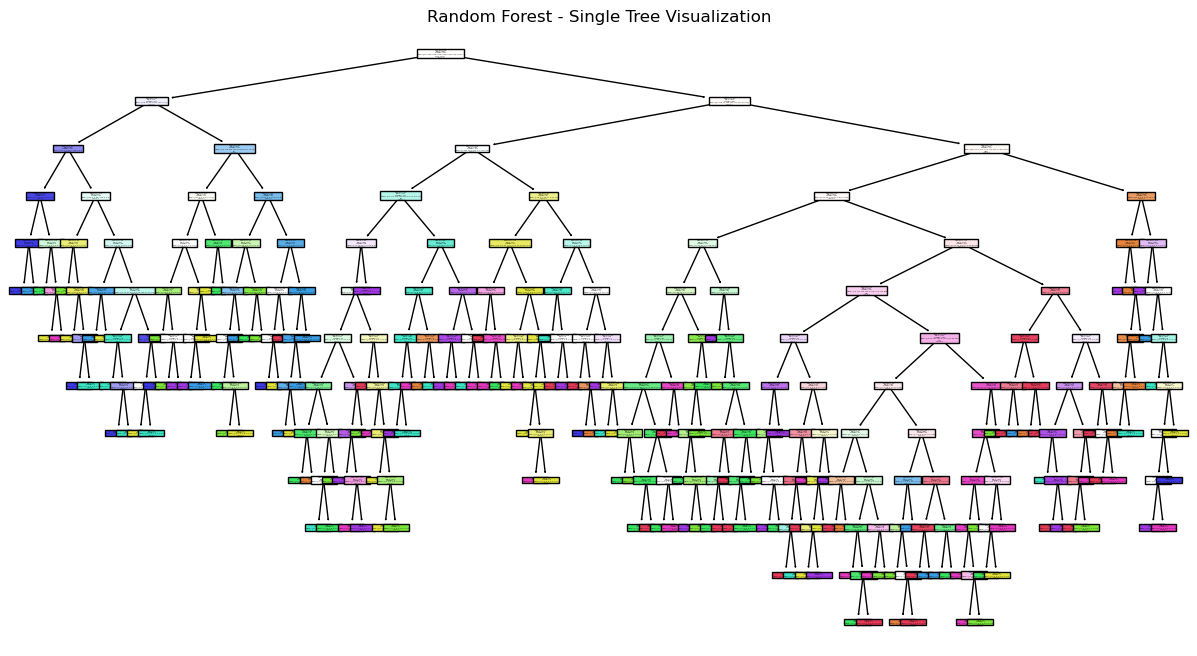

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Load dataset
digits = load_digits()
X = digits.images.reshape(digits.images.shape[0], -1)  # Flatten images
y = digits.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)  # Use fewer trees for visualization
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# 🌳 Visualizing One Tree in the Random Forest
plt.figure(figsize=(15, 8))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=[f'Pixel {i}' for i in range(X.shape[1])], class_names=[str(i) for i in np.unique(y)])
plt.title("Random Forest - Single Tree Visualization")
plt.show()

In [25]:
!pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.7 MB/s eta 0:00:00a 0:00:01


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91        51
           1       0.86      0.98      0.91        49

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



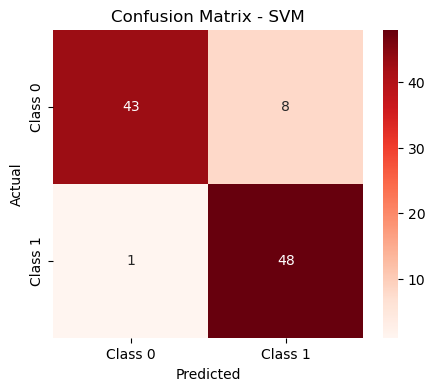

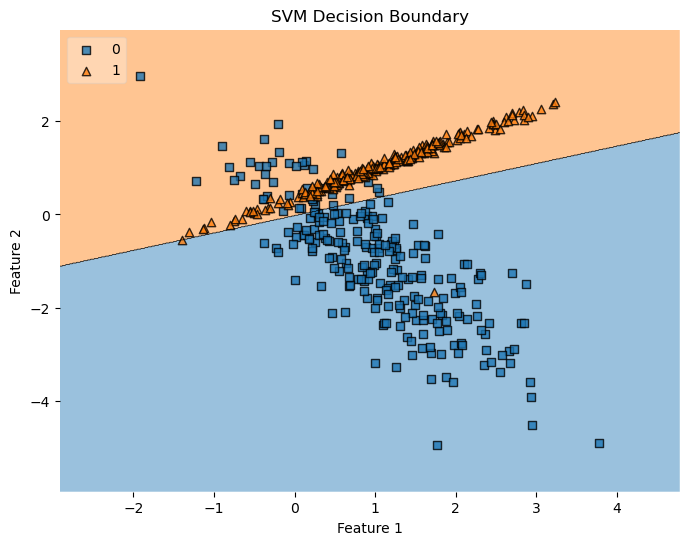

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions

# Generate 2D dataset
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
svm_pred = svm_model.predict(X_test)

# Evaluate model
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# ✨ Decision Boundary Visualization
plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, clf=svm_model, legend=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary")
plt.show()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9087 - loss: 0.2879 - val_accuracy: 0.9865 - val_loss: 0.0425
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9872 - loss: 0.0422 - val_accuracy: 0.9874 - val_loss: 0.0379
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9902 - loss: 0.0294 - val_accuracy: 0.9880 - val_loss: 0.0371
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9939 - loss: 0.0187 - val_accuracy: 0.9908 - val_loss: 0.0281
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9956 - loss: 0.0135 - val_accuracy: 0.9873 - val_loss: 0.0426
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9873
Precision: 0.9874
Recall: 0.9870
F1-Score: 0.9871


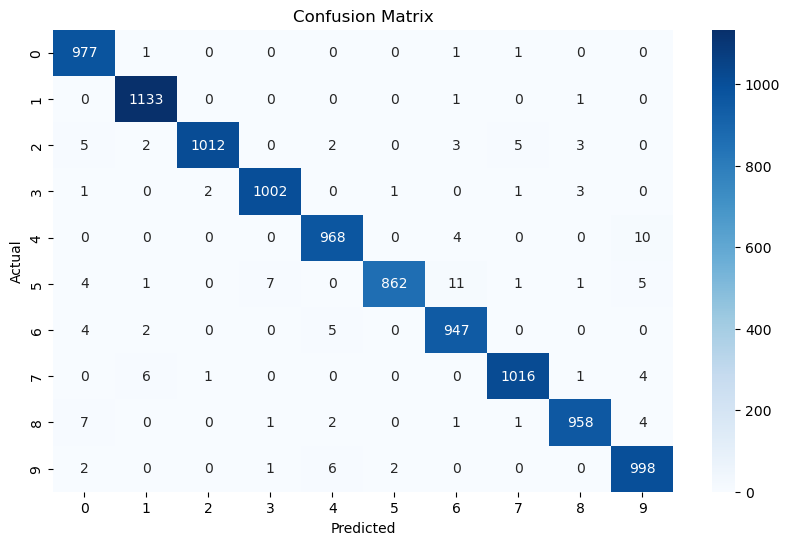

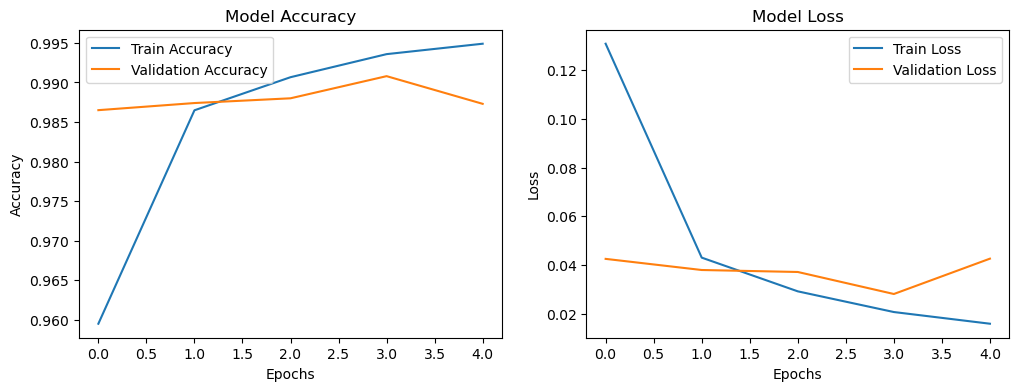

In [15]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load sample dataset (MNIST for demo, replace with real MRI dementia dataset)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define CNN Model
model = Sequential([
    Input(shape=(28, 28, 1)),  # Explicit input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for MNIST
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Training History Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


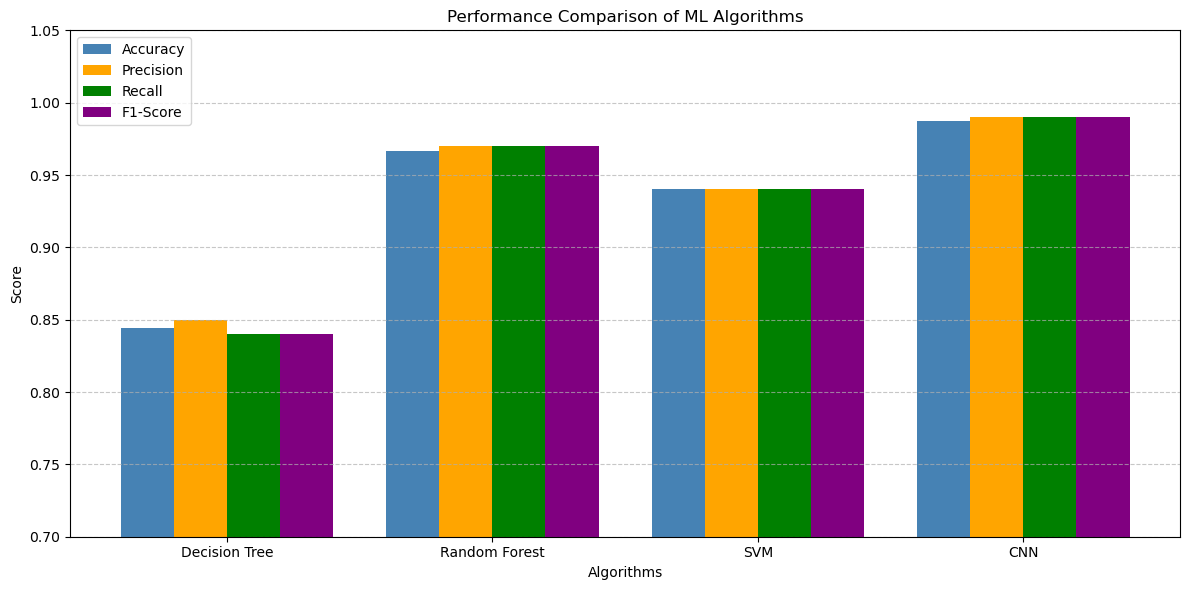

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Metrics from your models (Assume these are the actual outputs — replace with exact if needed)
# You can update the values from the actual print results
metrics = {
    'Decision Tree': {
        'accuracy': 0.8444,
        'precision': 0.85,
        'recall': 0.84,
        'f1_score': 0.84
    },
    'Random Forest': {
        'accuracy': 0.9667,
        'precision': 0.97,
        'recall': 0.97,
        'f1_score': 0.97
    },
    'SVM': {
        'accuracy': 0.9400,
        'precision': 0.94,
        'recall': 0.94,
        'f1_score': 0.94
    },
    'CNN': {
        'accuracy': 0.9874,
        'precision': 0.99,
        'recall': 0.99,
        'f1_score': 0.99
    }
}

# Prepare data for plotting
algorithms = list(metrics.keys())
acc = [metrics[model]['accuracy'] for model in algorithms]
prec = [metrics[model]['precision'] for model in algorithms]
rec = [metrics[model]['recall'] for model in algorithms]
f1 = [metrics[model]['f1_score'] for model in algorithms]

x = np.arange(len(algorithms))  # Label locations
width = 0.2  # Width of bars

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, acc, width, label='Accuracy', color='steelblue')
plt.bar(x - 0.5*width, prec, width, label='Precision', color='orange')
plt.bar(x + 0.5*width, rec, width, label='Recall', color='green')
plt.bar(x + 1.5*width, f1, width, label='F1-Score', color='purple')

plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Performance Comparison of ML Algorithms')
plt.xticks(x, algorithms)
plt.ylim(0.7, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd

# Create a DataFrame from the metrics dictionary
metrics_table = pd.DataFrame(metrics).T  # Transpose for better layout

# Round for cleaner view
metrics_table = metrics_table.round(4)

# Display table
print("\n🔍 Performance Comparison Table:")
print(metrics_table)


🔍 Performance Comparison Table:
               accuracy  precision  recall  f1_score
Decision Tree    0.8444       0.85    0.84      0.84
Random Forest    0.9667       0.97    0.97      0.97
SVM              0.9400       0.94    0.94      0.94
CNN              0.9874       0.99    0.99      0.99
